Basic Cleaning Example

Installing Yahoo finance api to get the stock data 

In [ ]:
pip install yfinance 

importing the yfinance to get the data, pandas to clean and handle the data and matplotlib to visualise the results 

In [2]:
import yfinance as yf 
import pandas as pd
import matplotlib.pyplot as plt

This will enable you to download the Apple stock data for 2024 and print it. 

In [3]:
apple_df = yf.download("AAPL", start = "2024-01-01", end = "2025-01-01")
print(apple_df.head()) # displays the first few rows of the data

C:\Users\anest\AppData\Local\Temp\ipykernel_18252\1440574700.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  apple_df = yf.download("AAPL", start = "2024-01-01", end = "2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  184.081497  186.857993  182.346189  185.578815  82488700
2024-01-03  182.703171  184.319491  181.890048  182.673424  58414500
2024-01-04  180.382828  181.552914  179.361476  180.620803  71983600
2024-01-05  179.658951  181.225688  178.657435  180.462163  62379700
2024-01-08  184.002182  184.041855  179.976269  180.561312  59144500


Before cleaning the data, you can inspect it by loading it using the command below, which will display the Index type (DatetimeIndex), Column data types and Missing values (if any).


In [4]:
print(apple_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2024-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   252 non-null    float64
 1   (High, AAPL)    252 non-null    float64
 2   (Low, AAPL)     252 non-null    float64
 3   (Open, AAPL)    252 non-null    float64
 4   (Volume, AAPL)  252 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB
None


This command will enable you to get the Summary Statistics by showing you the mean, std, min and max of price columns. This will help detect extreme outliers or weird data (e.g., negative prices).

In [5]:
print(apple_df.describe())

Price        Close        High         Low        Open        Volume
Ticker        AAPL        AAPL        AAPL        AAPL          AAPL
count   252.000000  252.000000  252.000000  252.000000  2.520000e+02
mean    206.038651  207.733222  204.060286  205.786234  5.710678e+07
std      25.624448   25.702995   25.254540   25.454003  3.072330e+07
min     163.823563  165.213575  162.910124  164.171055  2.323470e+07
25%     182.803547  183.944858  181.040213  182.342291  4.174738e+07
50%     213.025848  215.710762  210.719276  213.070592  4.983090e+07
75%     226.344086  228.302482  224.335928  226.427766  6.279472e+07
max     258.103729  259.179926  256.718662  257.276679  3.186799e+08


This command will enable you to check for missing values by showing you counts, this which helps decide if you should impute or drop those rows. 

In [6]:
print(apple_df.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


> This will allow you to forward fill any missing values; it copies the value from the previous day and keeps the price series smooth.

In [7]:
apple_df = apple_df.ffill()

> This will allow you to remove dupliucates dates.

In [10]:
apple_df = apple_df[~apple_df.index.duplicated(keep='first')]

> This will allow you to validate the data, by confirming if the columns are numeric and there are no negative prices.

This will make the Data column become a normal column istead of a index one, which will make it easier to use later for the graph. 

In [11]:
apple_df.reset_index(inplace=True)

In [12]:
print((apple_df[["Open", "Close"]] > 0).all()) 

Price  Ticker
Open   AAPL      True
Close  AAPL      True
dtype: bool


if you want you can save the cleaned data.

In [13]:
apple_df.to_csv("apple_stock_clean.csv", index=False)
print("Clean data saved!")

Clean data saved!


This will allow you to plot the data onto a graph to spot any anomalies or see trends.

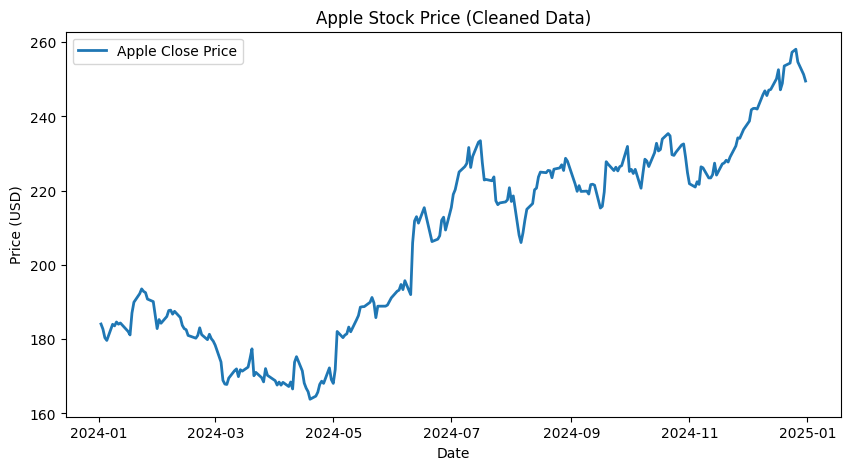

In [14]:
plt.figure(figsize=(10,5))
plt.plot(apple_df["Date"], apple_df["Close"], label="Apple Close Price", linewidth=2)
plt.title("Apple Stock Price (Cleaned Data)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


This ensures my model trains on a realistic, consistent dataset, a crucial foundation before any predictive modelling.